In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def loadDataSet():
    dataMat=[]
    labelMat=[]
    fr=open('testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    fr.close()
    return dataMat,labelMat

In [3]:
# import pandas as pd
# df=pd.read_csv('testSet.txt',header=None,sep='\t')
# df

In [4]:
def plotDataSet():
    dataMat,labelMat=loadDataSet()
    dataArr=np.array(dataMat)
    n=np.shape(dataMat)[0]
    xcord1=[];ycord1=[]
    xcord2=[];ycord2=[]
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=20,c='red',marker='s',alpha=.5)
    ax.scatter(xcord2,ycord2,s=20,c='green',alpha=.5)
    plt.title('DataSet')
    plt.xlabel('x')
    plt.ylabel('y')

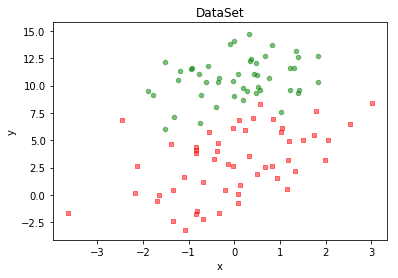

In [5]:
plotDataSet()

In [6]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [7]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix=np.mat(dataMatIn)
    labelMat=np.mat(classLabels).transpose()
    m,n=np.shape(dataMatrix)
    alpha=0.001
    maxCycles=500
    weights=np.ones((n,1))
    for k in range(maxCycles):
        h=sigmoid(dataMatrix*weights)
        error=labelMat-h
        weights=weights+alpha*dataMatrix.transpose()*error
    return weights.getA()

In [8]:
dataMat,labelMat=loadDataSet()
print(gradAscent(dataMat,labelMat))

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [9]:
def plotBestFit(weights):
    dataMat,labelMat=loadDataSet()
    dataArr=np.array(dataMat)
    n=np.shape(dataMat)[0]
    xcord1 = []; ycord1 = []                                            #正样本
    xcord2 = []; ycord2 = []                                            #负样本
    for i in range(n):                                                    #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)
    x=np.arange(-3.0,3.0,0.1)
    y=(-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.title('BestFit')
    plt.xlabel('x1')
    plt.ylabel('x2')

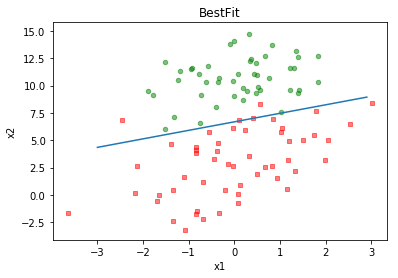

In [10]:
dataMat, labelMat = loadDataSet()           
weights = gradAscent(dataMat, labelMat)
plotBestFit(weights)

In [11]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n=np.shape(dataMatrix)
    weights=np.ones(n)
    for j in range(numIter):
        dataIndex=list(range(m))
        for i in range(m):
            alpha=4/(1.0+j+i)+0.01
            randIndex=int(random.uniform(0,len(dataIndex)))
            h=sigmoid(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

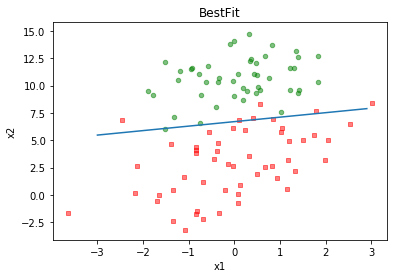

In [12]:
dataMat, labelMat = loadDataSet()
weights = stocGradAscent1(np.array(dataMat), labelMat)
plotBestFit(weights)

In [13]:
# dataMatrix=np.mat(dataMat)
# dataMatrix.shape
# weights=np.ones((3,1))
# weights

In [14]:
# s=dataMatrix*weights
# sigmoid(s)

In [15]:
# randIndex=int(random.uniform(0,100))
# randIndex
# a=list([1,2,3,4]) 
# del a[1]
# a

In [16]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                        #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                            #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                            #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.01                                                        #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                        #最大迭代次数
    weights = np.ones((n,1))
    weights_array = np.array([])
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
        weights_array = np.append(weights_array,weights)
    weights_array = weights_array.reshape(maxCycles,n)
    return weights.getA(),weights_array  
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)                                                #返回dataMatrix的大小。m为行数,n为列数。
    weights = np.ones(n)                                                       #参数初始化
    weights_array = np.array([])                                            #存储每次更新的回归系数
    for j in range(numIter):                                           
        dataIndex = list(range(m))
        for i in range(m):           
            alpha = 4/(1.0+j+i)+0.01                                            #降低alpha的大小，每次减小1/(j+i)。
            randIndex = int(random.uniform(0,len(dataIndex)))                #随机选取样本
            h = sigmoid(sum(dataMatrix[randIndex]*weights))                    #选择随机选取的一个样本，计算h
            error = classLabels[randIndex] - h                                 #计算误差
            weights = weights + alpha * error * dataMatrix[randIndex]       #更新回归系数
            weights_array = np.append(weights_array,weights,axis=0)         #添加回归系数到数组中
            del(dataIndex[randIndex])                                         #删除已经使用的样本
    weights_array = weights_array.reshape(numIter*m,n)                         #改变维度
    return weights,weights_array          

In [17]:
def plotWeights(weights_array1,weights_array2):
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=3,nclos=2时,代表fig画布被分为六个区域,axs[0][0]表示第一行第一列
    fig, axs = plt.subplots(nrows=3, ncols=2,sharex=False, sharey=False, figsize=(20,10))
    x1 = np.arange(0, len(weights_array1), 1)
    #绘制w0与迭代次数的关系
    axs[0][0].plot(x1,weights_array1[:,0])
    axs0_title_text = axs[0][0].set_title(u'改进的随机梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][0].plot(x1,weights_array1[:,1])
    axs1_ylabel_text = axs[1][0].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][0].plot(x1,weights_array1[:,2])
    axs2_xlabel_text = axs[2][0].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][0].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')


    x2 = np.arange(0, len(weights_array2), 1)
    #绘制w0与迭代次数的关系
    axs[0][1].plot(x2,weights_array2[:,0])
    axs0_title_text = axs[0][1].set_title(u'梯度上升算法：回归系数与迭代次数关系',FontProperties=font)
    axs0_ylabel_text = axs[0][1].set_ylabel(u'W0',FontProperties=font)
    plt.setp(axs0_title_text, size=20, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=20, weight='bold', color='black')
    #绘制w1与迭代次数的关系
    axs[1][1].plot(x2,weights_array2[:,1])
    axs1_ylabel_text = axs[1][1].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs1_ylabel_text, size=20, weight='bold', color='black')
    #绘制w2与迭代次数的关系
    axs[2][1].plot(x2,weights_array2[:,2])
    axs2_xlabel_text = axs[2][1].set_xlabel(u'迭代次数',FontProperties=font)
    axs2_ylabel_text = axs[2][1].set_ylabel(u'W1',FontProperties=font)
    plt.setp(axs2_xlabel_text, size=20, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=20, weight='bold', color='black')

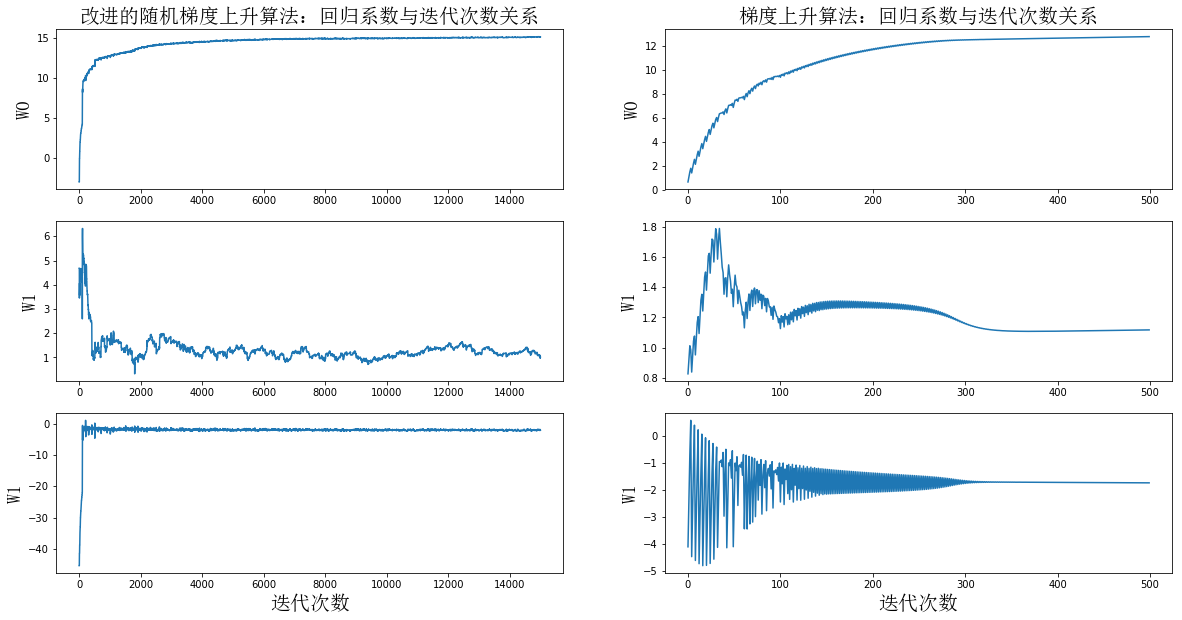

In [18]:
from matplotlib.font_manager import FontProperties
dataMat, labelMat = loadDataSet()           
weights1,weights_array1 = stocGradAscent1(np.array(dataMat), labelMat)

weights2,weights_array2 = gradAscent(dataMat, labelMat)
plotWeights(weights_array1, weights_array2)

In [34]:
def classifyVector(inX,weights):
    prob=sigmoid(sum(inX*weights))
    if prob>0.5:
        return 1.00
    else:
        return 0.0

In [35]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)                                                #返回dataMatrix的大小。m为行数,n为列数。
    weights = np.ones(n)                                                       #参数初始化                                        #存储每次更新的回归系数
    for j in range(numIter):                                           
        dataIndex = list(range(m))
        for i in range(m):           
            alpha = 4/(1.0+j+i)+0.01                                            #降低alpha的大小，每次减小1/(j+i)。
            randIndex = int(random.uniform(0,len(dataIndex)))                #随机选取样本
            h = sigmoid(sum(dataMatrix[randIndex]*weights))                    #选择随机选取的一个样本，计算h
            error = classLabels[randIndex] - h                                 #计算误差
            weights = weights + alpha * error * dataMatrix[randIndex]       #更新回归系数
            del(dataIndex[randIndex])                                         #删除已经使用的样本
    return weights

In [36]:
def colicTest():
    frTrain=open('horseColicTraining.txt')
    frTest=open('horseColicTest.txt')
    trainingSet=[]
    trainingLables=[]
    for line in frTrain.readlines():
        currLine=line.strip().split('\t')
        lineArr=[]
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLables.append(float(currLine[-1]))
    trainWeights=stocGradAscent1(np.array(trainingSet),trainingLables,500)
    errorCount=0
    numTestVec=0.0
    for line in frTest.readlines():
        numTestVec+=1.0
        currLine=line.strip().split('\t')
        lineArr=[]
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr),trainWeights))!=int(currLine[-1]):
            errorCount+=1
    errorRate=(float(errorCount)/numTestVec)*100
    print("测试集错误率为: %.2f%%" % errorRate)

In [37]:
colicTest()

测试集错误率为: 38.81%


In [38]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                        #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                            #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                            #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.01                                                        #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                        #最大迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()

In [39]:
def colicTest():
    frTrain = open('horseColicTraining.txt')                                        #打开训练集
    frTest = open('horseColicTest.txt')                                                #打开测试集
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))
    trainWeights = gradAscent(np.array(trainingSet), trainingLabels)        #使用改进的随即上升梯度训练
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights[:,0]))!= int(currLine[-1]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec) * 100                                 #错误率计算
    print("测试集错误率为: %.2f%%" % errorRate)

In [40]:
colicTest()

测试集错误率为: 28.36%


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
def colicSklearn():
    frTrain = open('horseColicTraining.txt')                                        #打开训练集
    frTest = open('horseColicTest.txt')                                                #打开测试集
    trainingSet = []; trainingLabels = []
    testSet = []; testLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))
    for line in frTest.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[-1]))
    classifier = LogisticRegression(solver='liblinear',max_iter=10).fit(trainingSet, trainingLabels)
    test_accurcy = classifier.score(testSet, testLabels) * 100
    print('正确率:%f%%' % test_accurcy)

In [43]:
colicSklearn()

正确率:73.134328%


In [44]:
import pandas as pd

In [60]:
df=pd.read_csv('horseColicTraining.txt',header=None,sep='\t')
train_data=df[df.columns[:21]]
train_label=df[df.columns[21]]
df=pd.read_csv('horseColicTest.txt',header=None,sep='\t')
test_data=df[df.columns[:21]]
test_label=df[df.columns[21]]

In [62]:
lr=LogisticRegression()
lr.fit(train_data,train_label)
lr.score(test_data,test_label)

0.7313432835820896